
## Introduction

In this project i worked with one Chinese downtown toronto restaurant with reviews. my data set have 179238 rows and 10 columns. so i have to sample the data first to make it more easy to process by me computer.

I would like to check what people like or dislike about this restaurant. i have 10000 record of reviews that i want to transform to some useful information after sampling. 



First i  cleaned the texts. removing all symbols and numbers and special characters.

After cleaning the text i grouped the text by starts. In this way i could compare the text that the low starts comments with high start comments and check what these 2 groups talk about. I needed to concatenate all the text for each group together and make a massive data set with 5 row for stars and each stars has one comments text.

After these works it was the time to count the text in each group. I victoriesed the text for each group and it returned the starts in row and word list in columns 

after transpose the matrix i got the reasonable dataset .

I generated the scatter of word frequency between each groups to see their relationship.


correlation maps helped me to observe the strong relationship between 1 and 2 starts group . another interesting relationship is between 4 and 5 stars.

after that I tried to look at the most frequent used word in barplot and i saw we have so many similar words in the plot so i started to add them to stop watch before i generate my word cloud.

in the after making stopwatch i generated the wordclouds for these 2 group to compare.



## The list of columns are

reviews.info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179239 entries, 0 to 179238
Data columns (total 10 columns):
id             179239 non-null object
business_id    179239 non-null object
user_id        179239 non-null object
stars          179239 non-null int64
date           179239 non-null object
text           179239 non-null object
useful         179239 non-null int64
funny          179239 non-null int64
cool           179239 non-null int64
elite          179239 non-null object
dtypes: int64(4), object(6)
memory usage: 13.7+ MB


As the data is too huge for my computer so i sample the data first.

In [5]:
reviews=sample_data(reviews)
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 136986 to 75660
Data columns (total 10 columns):
id             10000 non-null object
business_id    10000 non-null object
user_id        10000 non-null object
stars          10000 non-null int64
date           10000 non-null object
text           10000 non-null object
useful         10000 non-null int64
funny          10000 non-null int64
cool           10000 non-null int64
elite          10000 non-null object
dtypes: int64(4), object(6)
memory usage: 859.4+ KB


I checked the record and found duplication rows so i desided to remove the duplications

In [7]:
reviews=drop_duplication(reviews)
reviews.head()

,id,business_id,user_id,stars,date,text,useful,funny,cool,elite
5906,14lgC4_tM9e8LDDVZxaufw,4wtqTzXPPp_6vBfFQKiTGQ,mOVyk3O18VY5nrUMTZgM1w,4,2014-05-30 00:00:00,#MILESTONES #YELP #FOOD #COCKTAILS\n\nI really...,0,0,0,Yes
166992,LHXvey8e-q9oKTxDZfq3gg,kQyk1RDinqtGUsgfSlXJOQ,imPfhpAk61DqSW6K47D4QQ,5,2011-11-28 00:00:00,$2 for an excellent sandwich. Seriously it's o...,1,0,0,No
53938,DYsiy9timwBbFmUBC2YfFw,ykhL6KkPUq-ruDl0iyb0Ig,Mtavj9UzKi12Ou5n0zeKwQ,1,2016-04-08 00:00:00,$6.20 for a dinner was tempting but the food w...,0,1,0,No
150948,fcqxvqY8JlcqFnVtA3NdYg,Huo1lJmVkdqvFuLtA74Nhw,p2lIWB4wG1kiOh14yeb02A,4,2012-10-16 00:00:00,'authentic Italian' ... we'll soon be back to ...,2,2,3,No
156173,hDeBdCbtGPiFEAqo0PBdJg,F_oPMHJrH42R67xp5eKtQA,xecuSgvqSEQ9Fee_zk6WDw,2,2017-02-02 00:00:00,(2.5*)\n\nI absolutely HATE the green in this ...,0,1,0,Yes


## Clean Data

in this stage i should clean the texts. removing all symbols and numbers and special characters.


In [9]:
reviews=clean_data(reviews)

## Group reviews by stars

After cleaning the text i group the text by starts. in this way i can compare the text that the low starts comments with high start comments and check what these 2 groups talk about. i need to concatenate all the text for each group together and make a massive data set with 5 row for stars and each stars has one comments text.

In [11]:
StarsGroup=groupbyStars(reviews)
StarsGroup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 1 to 5
Data columns (total 2 columns):
stars    5 non-null int64
text     5 non-null object
dtypes: int64(1), object(1)
memory usage: 120.0+ bytes


## Vectorize the Data to count each word
Now it is a time to count the text in each group. i vectoriez the text for each group and it returns the starts in row and word list in columns , so i have a dataset with 5 rows and 25k columns. so i need to transpose it in the next level.

In [16]:
Vector_data=CountVector(StarsGroup)

In [17]:

Vector_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 1 to 5
Columns: 25061 entries, ___ to 麺は細くてちょうどよい硬さで
dtypes: int64(25061)
memory usage: 979.0 KB


## Transpose the data

After transpose the matrix i got the reasonable dataset with 9999 row and 6 columns.

In [19]:

WordCount=Wordcount_byStars(Vector_data)


In [20]:
WordCount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25061 entries, 0 to 25060
Data columns (total 6 columns):
Word      25061 non-null object
stars1    25061 non-null int64
stars2    25061 non-null int64
stars3    25061 non-null int64
stars4    25061 non-null int64
stars5    25061 non-null int64
dtypes: int64(5), object(1)
memory usage: 1.1+ MB


## Check the results

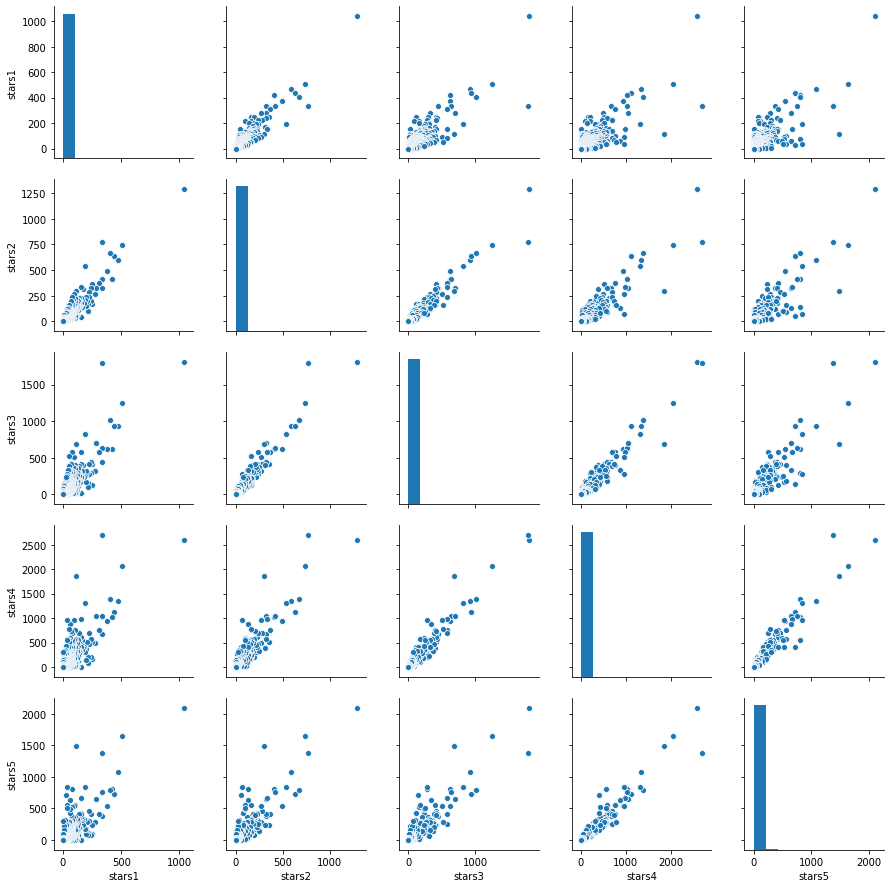

In [22]:
Plot_Scatter(WordCount)


As you can see , we can see stronger relation between 1 and 2 stars and also between 4 and 5 starts. Lets look at the corelations map. 

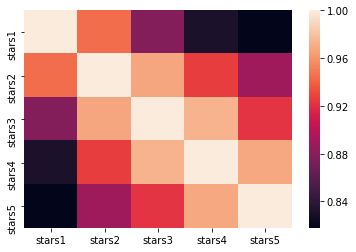

In [23]:
Plot_HeatMap(WordCount)

In [ ]:
I made the data in 2 groups
- Happy Customers
- Angry Customers
So lets see what happy customer disliked:


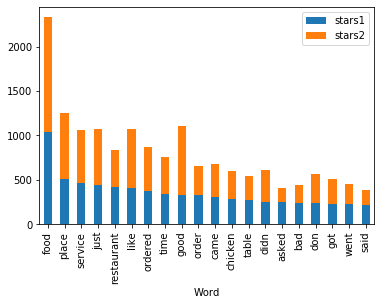

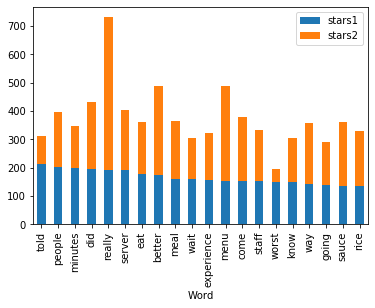

In [24]:
Plot_lowrate_bar(WordCount)

In [ ]:
And now what Happy Customers like

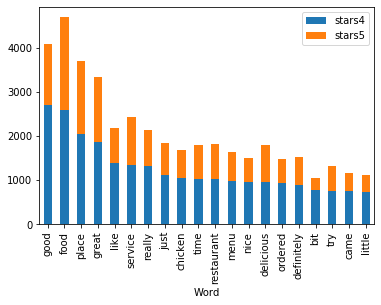

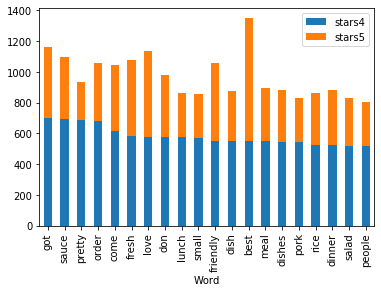

In [25]:
Plot_highrate_bar(WordCount)

In [ ]:
I needed to add the common words between 2 groups to my stop watch befor generate my word cload.clear

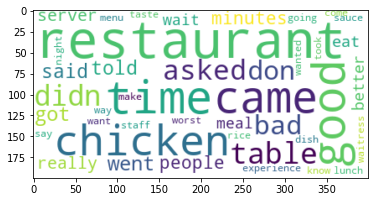

In [26]:
WordCloud_lowStars(WordCount)

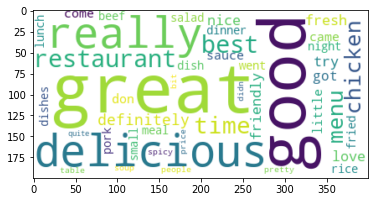

In [27]:
WordCload_HighStars(WordCount)

## Conclusion

1. I saw the strong and clear relationships between the words in groups with closer stars rating 

2. Clearly I can see the diffrence of the words that used by these 2 groups
- Angry Customers talked about :  time, chicken, table, serve, suace,wait, taste
- Happy customers talked about :  lunch, pork, spicy, friendly, beef
    
3. I can see the chicken is not so nice in this restourant but pork and beaf are not bad.
    